In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Loading the dataset from a local CSV file to pandas data frame
creditcard_data = pd.read_csv('/content/creditcard.csv')

In [ ]:
# displaying the first 10 rows of the dataset

creditcard_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
# displaying the loaded dataset information

creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column in the dataset

creditcard_data.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# checking whether the dataset is balanced or not

targetdata_count = creditcard_data['Class'].value_counts()

print('Class 0:', targetdata_count[0])
print('Class 1:', targetdata_count[1])

is_balanced = targetdata_count[0] == targetdata_count[1]

if (is_balanced == False): print('The Dataset is Unbalanced')
else: print('The dataset is balanced')

Class 0: 284315
Class 1: 492
The Dataset is Unbalanced


##Distribution of legit transactions & fraudulent transactions







*   0 ==> Normal Transaction
*   1 ==> Fraudulent Transaction




Legitimate Transactions: 284315
Fraudulent Transactions: 492


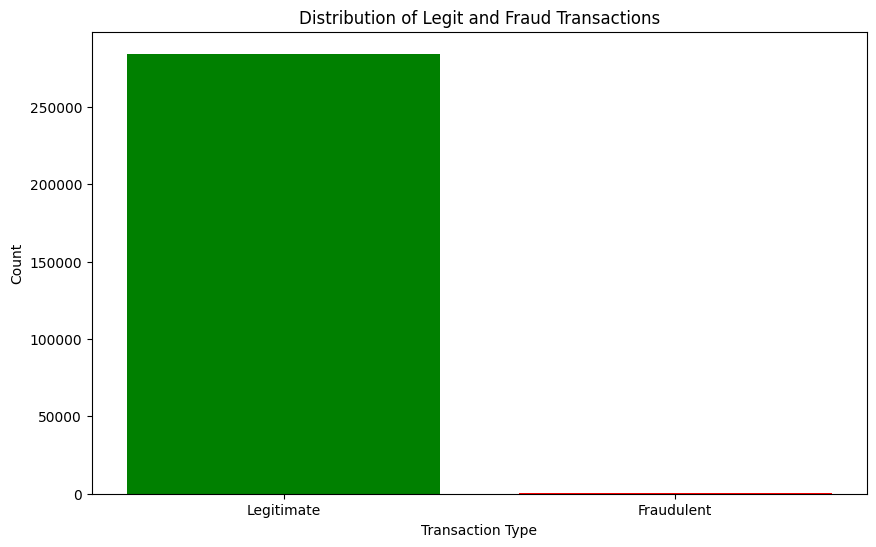

In [ ]:
# Separating the dataset into legit and fraudulent for analysis

legit_transactions = creditcard_data[creditcard_data['Class'] == 0]
fraud_transactions = creditcard_data[creditcard_data['Class'] == 1]

legit = len(legit_transactions)
fraud = len(fraud_transactions)

print(f'Legitimate Transactions: {legit}')
print(f'Fraudulent Transactions: {fraud}')

# Visualizing the distribution of legit and fraudulent transactions
plt.figure(figsize=(10, 6))
plt.bar(['Legitimate', 'Fraudulent'], [legit, fraud], color=['green', 'red'])
plt.title('Distribution of Legit and Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# statistical measures of the data

creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Comparing the means of the two classes for each column
for col in creditcard_data.columns[:-1]:
  legit_mean = legit_transactions[col].mean()
  fraud_mean = fraud_transactions[col].mean()
  print(f"Column: {col}")
  print(f"Legitimate mean: {legit_mean:.2f}")
  print(f"Fraudulent mean: {fraud_mean:.2f}")
  print()

# Comparing the standard deviations of the two classes for each column
for col in creditcard_data.columns[:-1]:
  legit_std = legit_transactions[col].std()
  fraud_std = fraud_transactions[col].std()
  print(f"Column: {col}")
  print(f"Legitimate standard deviation: {legit_std:.2f}")
  print(f"Fraudulent standard deviation: {fraud_std:.2f}")
  print()


Column: Time
Legitimate mean: 94838.20
Fraudulent mean: 80746.81

Column: V1
Legitimate mean: 0.01
Fraudulent mean: -4.77

Column: V2
Legitimate mean: -0.01
Fraudulent mean: 3.62

Column: V3
Legitimate mean: 0.01
Fraudulent mean: -7.03

Column: V4
Legitimate mean: -0.01
Fraudulent mean: 4.54

Column: V5
Legitimate mean: 0.01
Fraudulent mean: -3.15

Column: V6
Legitimate mean: 0.00
Fraudulent mean: -1.40

Column: V7
Legitimate mean: 0.01
Fraudulent mean: -5.57

Column: V8
Legitimate mean: -0.00
Fraudulent mean: 0.57

Column: V9
Legitimate mean: 0.00
Fraudulent mean: -2.58

Column: V10
Legitimate mean: 0.01
Fraudulent mean: -5.68

Column: V11
Legitimate mean: -0.01
Fraudulent mean: 3.80

Column: V12
Legitimate mean: 0.01
Fraudulent mean: -6.26

Column: V13
Legitimate mean: 0.00
Fraudulent mean: -0.11

Column: V14
Legitimate mean: 0.01
Fraudulent mean: -6.97

Column: V15
Legitimate mean: 0.00
Fraudulent mean: -0.09

Column: V16
Legitimate mean: 0.01
Fraudulent mean: -4.14

Column: V17
Leg

In [ ]:
# Comparing the values for both transactions
grouped_data = creditcard_data.groupby('Class').mean()

# Printing the grouped data
print(grouped_data)


               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94838.202258  0.008258 -0.006271  0.012171 -0.007860  0.005453   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.002419  0.009637 -0.000987  0.004467  ... -0.000644 -0.001235   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.000024  0.000070  0.000182 -0.000072 -0.000089 -0.000295 -0.000131   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       88.291022  
1      122.211321  

[2 rows x 30

# UNDER SAMPLING
# Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

In [ ]:
# Select 492 random legit transactions from the original dataset
legit_sample = legit_transactions.sample(n=492)

# Combining the sampled data into a new DataFrame
sample_data = pd.concat([legit_sample, fraud_transactions], axis=0)
sample_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
260979,159806.0,2.224182,-0.564245,-1.415161,-0.936711,-0.375259,-1.270019,-0.196514,-0.359383,-0.705422,...,0.066566,0.119733,0.310969,1.079128,-0.112569,-0.366213,-0.048957,-0.053831,4.99,0
234475,147987.0,-4.419760,-0.282664,-2.098213,-0.430370,1.247440,-0.273667,1.926472,-1.151052,0.924089,...,-0.760119,-0.006837,0.922937,0.193905,-0.389308,0.073741,-1.650445,1.436174,133.95,0
97891,66425.0,-6.389915,-3.400329,0.188289,1.992212,-1.163820,0.025076,-0.377775,1.746533,-0.273727,...,-0.079453,-0.685714,0.316677,0.289281,0.296458,0.712986,0.429314,-0.963942,132.00,0
275713,166686.0,2.134370,0.045444,-2.214460,0.248830,0.757805,-1.003921,0.652192,-0.438842,0.194861,...,0.076214,0.367561,-0.038650,0.552718,0.429065,0.695824,-0.121038,-0.079924,10.58,0
120011,75678.0,-0.197932,0.784933,1.702616,1.071762,0.106036,-0.340248,0.967326,-0.323766,-0.179322,...,-0.094281,0.087690,-0.051123,0.394181,-0.354393,-0.500573,0.028179,-0.047672,37.81,0


In [ ]:
# Printing the count of legit and fraud transactions in the sample data
print(f'Legitimate Transactions: {len(sample_data[sample_data["Class"] == 0])}')
print(f'Fraudulent Transactions: {len(sample_data[sample_data["Class"] == 1])}')


Legitimate Transactions: 492
Fraudulent Transactions: 492


In [ ]:
print(sample_data['Class'].value_counts())

0    492
1    492
Name: Class, dtype: int64


In [ ]:
grouped_data = sample_data.groupby('Class').mean()
print(grouped_data)

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94028.215447 -0.134813  0.010558  0.087765  0.038096  0.041460   
1      80746.806911 -4.771948  3.623778 -7.033281  4.542029 -3.151225   

             V6        V7        V8        V9  ...       V20       V21  \
Class                                          ...                       
0      0.006868 -0.024226 -0.012947 -0.008017  ... -0.024131  0.025551   
1     -1.397737 -5.568731  0.570636 -2.581123  ...  0.372319  0.713588   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0     -0.038014  0.044531 -0.002291 -0.020458  0.034858 -0.000676 -0.026530   
1      0.014049 -0.040308 -0.105130  0.041449  0.051648  0.170575  0.075667   

           Amount  
Class              
0       77.693008  
1      122.211321  

[2 rows x 30

In [ ]:
# Splitting the data into Features & Targets

X = sample_data.drop(columns=['Class'])
y = sample_data['Class']

print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')


Shape of X: (984, 30)
Shape of y: (984,)


In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
260979  159806.0  2.224182 -0.564245 -1.415161 -0.936711 -0.375259 -1.270019   
234475  147987.0 -4.419760 -0.282664 -2.098213 -0.430370  1.247440 -0.273667   
97891    66425.0 -6.389915 -3.400329  0.188289  1.992212 -1.163820  0.025076   
275713  166686.0  2.134370  0.045444 -2.214460  0.248830  0.757805 -1.003921   
120011   75678.0 -0.197932  0.784933  1.702616  1.071762  0.106036 -0.340248   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(y)

260979    0
234475    0
97891     0
275713    0
120011    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [ ]:
# Spliting the data into Training & Testing Datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Printing the shapes of the train and test sets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (787, 30)
Shape of y_train: (787,)
Shape of X_test: (197, 30)
Shape of y_test: (197,)


# Model Training - Logistic Regression

In [ ]:
# Training the model with Logistic Regression
model = LogisticRegression(max_iter= 10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

# Model Evaluation - Accuracy Score in training data and testing data

In [ ]:
# Calculating accuracy score on training data
y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

# Calculating accuracy score on testing data
y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Printing the accuracy scores
print(f'Accuracy on training data: {accuracy_train:.2f}')
print(f'Accuracy on testing data: {accuracy_test:.2f}')


Accuracy on training data: 0.94
Accuracy on testing data: 0.95
